# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# # Creat URL.
# url ="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key




# Create row to process down the list
row_counter = 1
# Create a dictionary with parameters using api
params = {"appid": weather_api_key, 
          "units": "imperial"}
# Call the input URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# Create query url
query_url = f"{url}appid={params['appid']}&units={params['units']}&q="

In [4]:
# set lists for the dataframe
city_outcome = []
cloudiness = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
record_count = 0
set_count = 1

# loops for creating dataframe columns
print("Beginning Data Retrieval")
print("------------------------------")
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if record_count > 48:
            record_count = 1
            set_count += 1
            city_outcome.append(city)
        else:
            record_count += 1
            city_outcome.append(city)
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
    except:
        print("City not found. Skipping...")
    pass
print("Ending Data Retrieval")
print("------------------------------")        

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | mutsu
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | abu kamal
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | college
Processing Record 7 of Set 1 | port macquarie
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | ancud
Processing Record 11 of Set 1 | bilma
Processing Record 12 of Set 1 | jibuti
Processing Record 13 of Set 1 | sao filipe
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | takoradi
Processing Record 19 of Set 1 | medea
Processing Record 20 of Set 1 | north myrtle beach
City not found. Skipping...
Processing Record 21 of Set 1 | bend
City not found. Skipping...
Processing Record 22 of Set 1 | solne

Processing Record 42 of Set 4 | hurghada
Processing Record 43 of Set 4 | dingle
Processing Record 44 of Set 4 | mercedes
Processing Record 45 of Set 4 | sola
Processing Record 46 of Set 4 | xining
Processing Record 47 of Set 4 | nome
Processing Record 48 of Set 4 | new norfolk
Processing Record 49 of Set 4 | tongliao
Processing Record 1 of Set 5 | beloha
Processing Record 2 of Set 5 | guerrero negro
Processing Record 3 of Set 5 | kahului
Processing Record 4 of Set 5 | lagarto
Processing Record 5 of Set 5 | kapit
Processing Record 6 of Set 5 | kanniyakumari
Processing Record 7 of Set 5 | okha
Processing Record 8 of Set 5 | winneba
Processing Record 9 of Set 5 | constitucion
Processing Record 10 of Set 5 | lima
City not found. Skipping...
Processing Record 11 of Set 5 | cururupu
Processing Record 12 of Set 5 | kuah
City not found. Skipping...
City not found. Skipping...
Processing Record 13 of Set 5 | hermanus
City not found. Skipping...
Processing Record 14 of Set 5 | nemuro
Processing 

Processing Record 30 of Set 8 | baykit
Processing Record 31 of Set 8 | becerril
Processing Record 32 of Set 8 | kavieng
Processing Record 33 of Set 8 | pandhana
Processing Record 34 of Set 8 | morgantown
Processing Record 35 of Set 8 | changping
Processing Record 36 of Set 8 | naze
Processing Record 37 of Set 8 | najran
Processing Record 38 of Set 8 | mlonggo
Processing Record 39 of Set 8 | qaqortoq
City not found. Skipping...
Processing Record 40 of Set 8 | kapiri mposhi
Processing Record 41 of Set 8 | roma
City not found. Skipping...
Processing Record 42 of Set 8 | belyy yar
Processing Record 43 of Set 8 | vardo
Processing Record 44 of Set 8 | key largo
Processing Record 45 of Set 8 | caravelas
Processing Record 46 of Set 8 | dudinka
Processing Record 47 of Set 8 | buala
Processing Record 48 of Set 8 | belogorsk
Processing Record 49 of Set 8 | meulaboh
Processing Record 1 of Set 9 | cabo san lucas
Processing Record 2 of Set 9 | ordynskoye
City not found. Skipping...
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_data ={
    "City":city_outcome,
    "Cloudiness":cloudiness,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}



weather_py = pd.DataFrame(city_data)
weather_py.count()

City          555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Lng           555
Max Temp      555
Wind Speed    555
dtype: int64

In [9]:
output_data_file = "output_data/cities.csv"
weather_py

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mutsu,76,JP,1627104786,75,41.2894,141.2169,84.00,9.69
1,vaini,20,TO,1627104787,89,-21.2000,-175.2000,78.96,3.44
2,bluff,78,NZ,1627104787,80,-46.6000,168.3333,47.97,6.73
3,abu kamal,33,IN,1627104788,56,24.6000,72.7000,79.34,4.43
4,cape town,100,CL,1627104788,92,-36.4130,-71.9028,36.82,1.21
...,...,...,...,...,...,...,...,...,...
550,camrose,17,CA,1627105012,52,53.0168,-112.8353,56.93,7.20
551,tessalit,72,ML,1627105012,41,20.1986,1.0114,86.02,10.89
552,punta alta,39,PH,1627105013,55,8.9897,125.3400,90.16,10.16
553,tilichiki,71,RU,1627105014,78,60.4667,166.1000,57.25,8.97


In [10]:
humidity_df=weather_py.loc[weather_py["Humidity"] > 100]
humidity_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

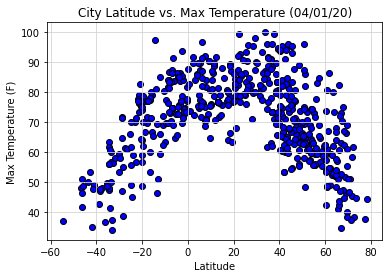

In [13]:
plt.scatter(weather_py["Lat"],weather_py["Max Temp"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Temperature Plot.png")
plt.show()

## Latitude vs. Humidity Plot

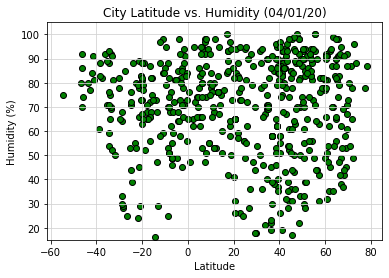

In [15]:
plt.scatter(weather_py["Lat"],weather_py["Humidity"],edgecolors="black",facecolors="green")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Humidity Plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

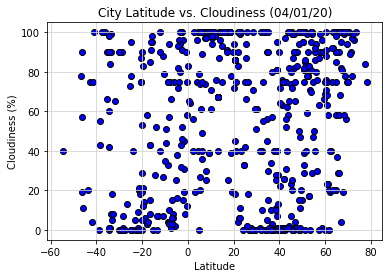

In [16]:
plt.scatter(weather_py["Lat"],weather_py["Cloudiness"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Cloudiness Plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

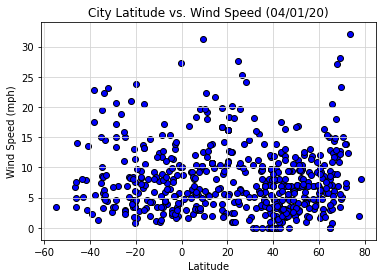

In [17]:
plt.scatter(weather_py["Lat"],weather_py["Wind Speed"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Wind Speed.png")
plt.show()

## Linear Regression

In [26]:
# create variables for hemishpheres
Northern_Hem= weather_py.loc[pd.to_numeric(weather_py["Lat"]).astype(float) <0, :]
Southern_Hem = weather_py.loc[pd.to_numeric(weather_py["Lat"]).astype(float) >0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : 0.7735137938210428


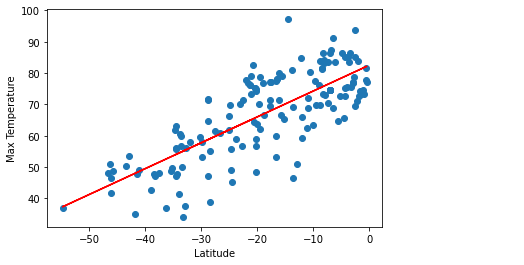

In [27]:
# create x and y values
x=pd.to_numeric(Northern_Hem["Lat"]).astype(float)
y=pd.to_numeric(Northern_Hem["Max Temp"]).astype(float)


(slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)

# slope intercept formula
slope_intercept = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=x* slope + intercept



# Plotting
plt.scatter(x,y)
plt.plot(x,r_value,"r-")
plt.annotate(slope_intercept,(10,40), fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

print(f"The r-value is : {rvalue}")

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : -0.6353861590126827


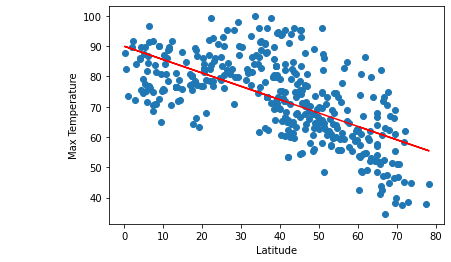

In [31]:
# create x and y values
x=pd.to_numeric(Southern_Hem["Lat"]).astype(float)
y=pd.to_numeric(Southern_Hem["Max Temp"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)


# slope intercept formula
slope_intercept = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=x* slope + intercept



# Plotting
plt.scatter(x,y)
plt.plot(x,r_value,"r-")
plt.annotate(slope_intercept,(-30,30), fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

print(f"The r-value is : {rvalue}")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : -0.6353861590126827


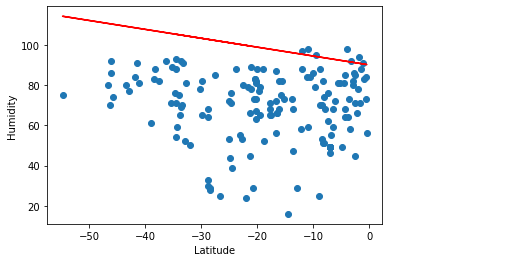

In [32]:
# create x and y values
x=pd.to_numeric(Northern_Hem["Lat"]).astype(float)
y=pd.to_numeric(Northern_Hem["Humidity"]).astype(float)


# slope intercept formula
slope_intercept = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=x* slope + intercept



# Plotting
plt.scatter(x,y)
plt.plot(x,r_value,"r-")
plt.annotate(slope_intercept,(10,20), fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is : {rvalue}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : -0.6353861590126827


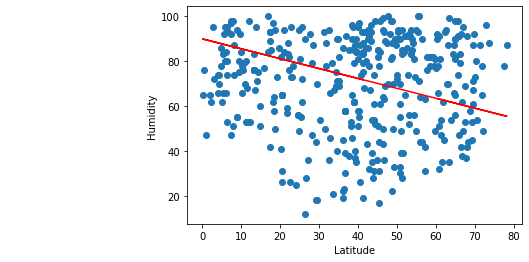

In [33]:
# create x and y values
x=pd.to_numeric(Southern_Hem["Lat"]).astype(float)
y=pd.to_numeric(Southern_Hem["Humidity"]).astype(float)


# slope intercept formula
slope_intercept = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=x* slope + intercept



# Plotting
plt.scatter(x,y)
plt.plot(x,r_value,"r-")
plt.annotate(slope_intercept,(-50,20), fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is : {rvalue}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : -0.6353861590126827


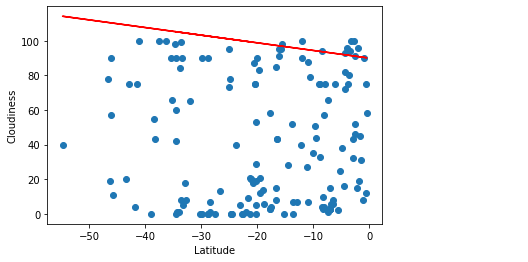

In [34]:
# create x and y values
x=pd.to_numeric(Northern_Hem["Lat"]).astype(float)
y=pd.to_numeric(Northern_Hem["Cloudiness"]).astype(float)


# slope intercept formula
slope_intercept = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=x* slope + intercept



# Plotting
plt.scatter(x,y)
plt.plot(x,r_value,"r-")
plt.annotate(slope_intercept,(10,20), fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is : {rvalue}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : -0.6353861590126827


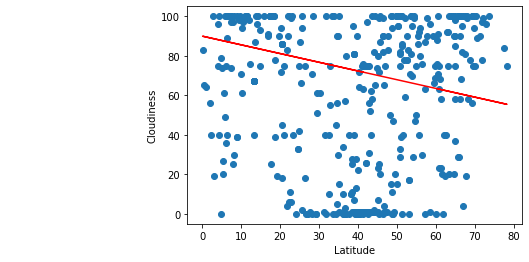

In [36]:
# create x and y values
x=pd.to_numeric(Southern_Hem["Lat"]).astype(float)
y=pd.to_numeric(Southern_Hem["Cloudiness"]).astype(float)


# slope intercept formula
slope_intercept = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=x* slope + intercept



# Plotting
plt.scatter(x,y)
plt.plot(x,r_value,"r-")
plt.annotate(slope_intercept,(-50,20), fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is : {rvalue}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : -0.6353861590126827


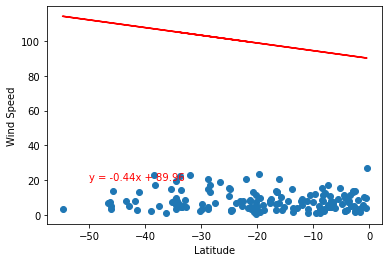

In [37]:
# create x and y values
x=pd.to_numeric(Northern_Hem["Lat"]).astype(float)
y=pd.to_numeric(Northern_Hem["Wind Speed"]).astype(float)


# slope intercept formula
slope_intercept = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=x* slope + intercept



# Plotting
plt.scatter(x,y)
plt.plot(x,r_value,"r-")
plt.annotate(slope_intercept,(-50,20), fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is : {rvalue}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : -0.6353861590126827


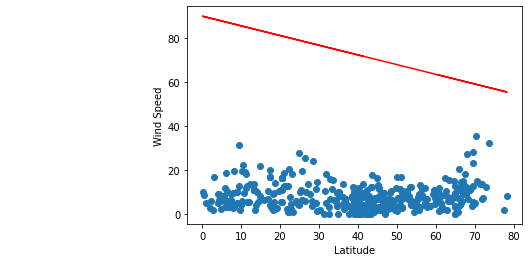

In [39]:
# create x and y values
x=pd.to_numeric(Southern_Hem["Lat"]).astype(float)
y=pd.to_numeric(Southern_Hem["Wind Speed"]).astype(float)


# slope intercept formula
slope_intercept = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=x* slope + intercept



# Plotting
plt.scatter(x,y)
plt.plot(x,r_value,"r-")
plt.annotate(slope_intercept,(-50,20), fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is : {rvalue}")

plt.show()